In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
from IPython.display import display

In [10]:
# Read the data form the excel file

# Read Excel file into a DataFrame
data = pd.read_excel('shs_ipat_data.xlsx', sheet_name='Germany', index_col=0, na_values=['nan', '0'])


# Separate the data for with the factors for the ipat decomposition

ipat = data[['private CD', 'Population', 'HH / Pop', 'DW / HH', 'new DW / tot DW', 'sqm / new DW [sqm]','CD / sqm [t / sqm]', 'DW / Pop', 'Rooms / new DW', 'sqm / Rooms', 'new DW']].copy()

#Check that all the values are floats and in case they are not, convert them to floats
for column in ipat.columns:
    ipat[column] = pd.to_numeric(ipat[column], errors='coerce')

# Remove rows with invalid values
ipat = ipat.dropna()

display(ipat)


,private CD,Population,HH / Pop,DW / HH,new DW / tot DW,sqm / new DW [sqm],CD / sqm [t / sqm],DW / Pop,Rooms / new DW,sqm / Rooms,new DW
Year,,,,,,,,,,,
2015.0,0.307,82176000.0,0.496179,1.016488,0.005229,108.952738,0.345835,0.504360,4.354423,25.021166,216727.0
2016.0,0.314,82522000.0,0.496352,1.018148,0.005651,105.559752,0.347122,0.505360,4.193306,25.173399,235658.0
2017.0,0.317,82792000.0,0.498889,1.016078,0.005845,104.368457,0.356597,0.506910,4.096109,25.479900,245304.0
2018.0,0.320,83019000.0,0.498416,1.020721,0.005951,102.555125,0.360025,0.508744,3.997724,25.653377,251338.0
2019.0,0.330,83167000.0,0.499068,1.024256,0.006020,103.159129,0.358736,0.511174,3.989638,25.856767,255925.0
2020.0,0.312,83155000.0,0.494330,1.041301,0.006279,103.235432,0.338458,0.514746,3.976661,25.960332,268774.0
2021.0,0.302,83237000.0,0.500967,1.033217,0.005950,100.818406,0.340035,0.517608,3.869508,26.054583,256352.0
2022.0,0.310,84359000.0,0.494541,1.039500,0.005968,101.242687,0.331285,0.514076,3.862497,26.211721,258794.0


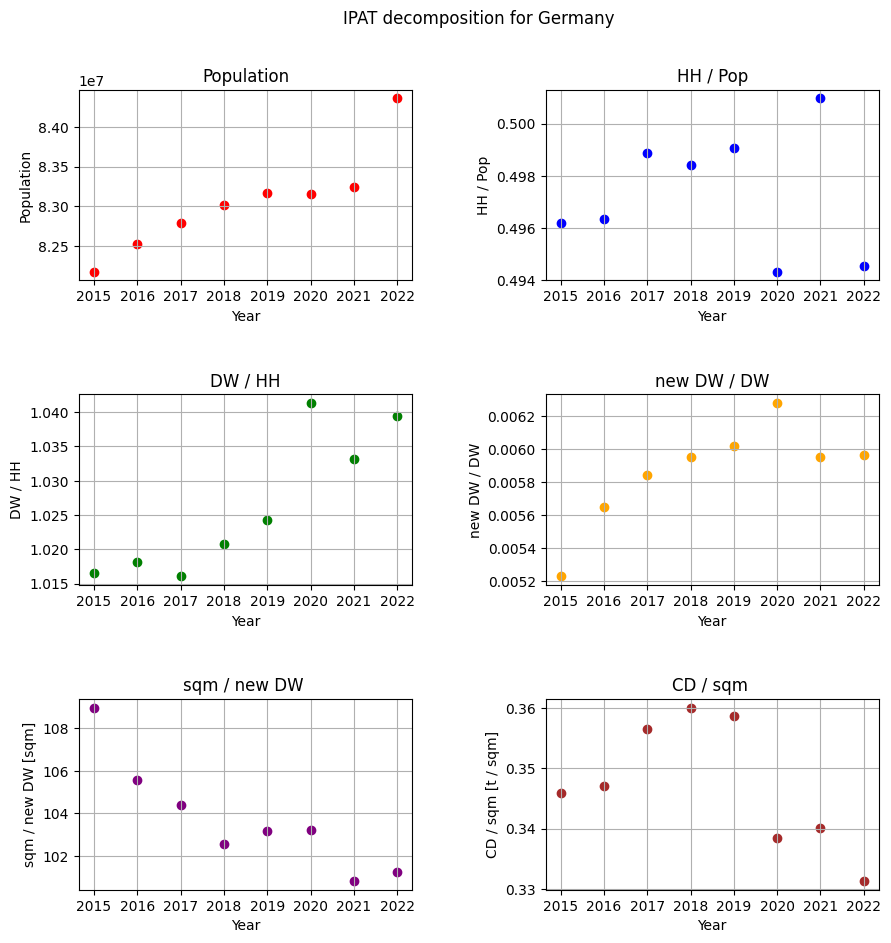

In [11]:
# Plots graphs for every column in the ipat decomposition with nice different colors

fig, axs = plt.subplots(3, 2, figsize=(10, 10))
fig.suptitle('IPAT decomposition for Germany')
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.6)

axs[0, 0].scatter(ipat.index, ipat['Population'], color='red', marker='o')
axs[0, 0].set_title('Population')
axs[0,0].set_ylabel('Population')
axs[0,0].set_xlabel('Year')
axs[0,0].set_xticks(range(int(axs[0,0].get_xlim()[0])+1, int(axs[0,0].get_xlim()[1]) + 1))
axs[0,0].grid()

axs[0, 1].scatter(ipat.index, ipat['HH / Pop'], color='blue', marker='o')
axs[0, 1].set_title('HH / Pop')
axs[0,1].set_ylabel('HH / Pop')
axs[0,1].set_xlabel('Year')
axs[0,1].set_xticks(range(int(axs[0,1].get_xlim()[0])+1, int(axs[0,1].get_xlim()[1]) + 1))
axs[0,1].grid()

axs[1, 0].scatter(ipat.index, ipat['DW / HH'], color='green', marker='o')
axs[1, 0].set_title('DW / HH')
axs[1,0].set_ylabel('DW / HH')
axs[1,0].set_xlabel('Year')
axs[1,0].set_xticks(range(int(axs[1,0].get_xlim()[0])+1, int(axs[1,0].get_xlim()[1]) + 1))
axs[1,0].grid()

axs[1, 1].scatter(ipat.index, ipat['new DW / tot DW'], color='orange', marker='o')
axs[1, 1].set_title('new DW / DW')
axs[1,1].set_ylabel('new DW / DW')
axs[1,1].set_xlabel('Year')
axs[1,1].set_xticks(range(int(axs[1,1].get_xlim()[0])+1, int(axs[1,1].get_xlim()[1]) + 1))
axs[1,1].grid()

axs[2, 0].scatter(ipat.index, ipat['sqm / new DW [sqm]'], color='purple', marker='o')
axs[2, 0].set_title('sqm / new DW ')
axs[2,0].set_ylabel('sqm / new DW [sqm]')
axs[2,0].set_xlabel('Year')
axs[2,0].set_xticks(range(int(axs[2,0].get_xlim()[0])+1, int(axs[2,0].get_xlim()[1]) + 1))
axs[2,0].grid()

axs[2, 1].scatter(ipat.index, ipat['CD / sqm [t / sqm]'], color='brown', marker='o')
axs[2, 1].set_title('CD / sqm ')
axs[2,1].set_ylabel('CD / sqm [t / sqm]')
axs[2,1].set_xlabel('Year')
axs[2,1].set_xticks(range(int(axs[2,1].get_xlim()[0])+1, int(axs[2,1].get_xlim()[1]) + 1))
axs[2,1].grid()

plt.show()

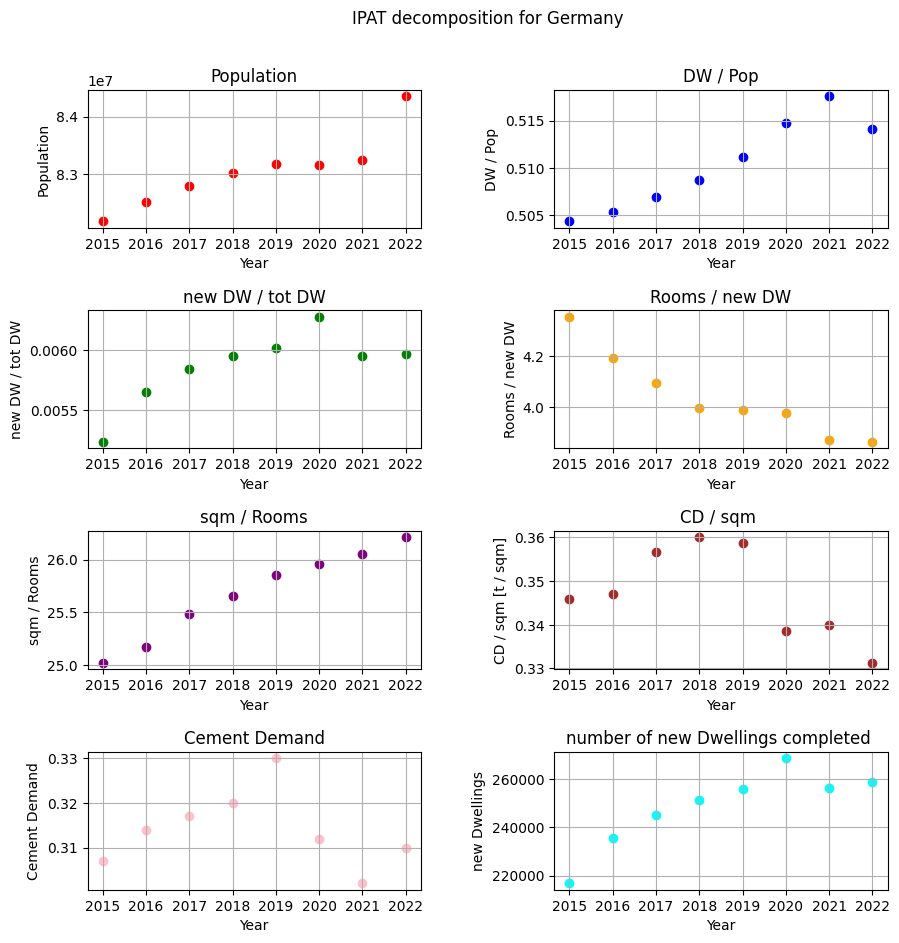

In [13]:
# Plots graphs for every column in the ipat decomposition with nice different colors

fig, axs = plt.subplots(4, 2, figsize=(10, 10))
fig.suptitle('IPAT decomposition for Germany')
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.6)

axs[0, 0].scatter(ipat.index, ipat['Population'], color='red', marker='o')
axs[0, 0].set_title('Population')
axs[0,0].set_ylabel('Population')
axs[0,0].set_xlabel('Year')
axs[0,0].set_xticks(range(int(axs[0,0].get_xlim()[0])+1, int(axs[0,0].get_xlim()[1]) + 1))
axs[0,0].grid()

axs[0, 1].scatter(ipat.index, ipat['DW / Pop'], color='blue', marker='o')
axs[0, 1].set_title('DW / Pop')
axs[0,1].set_ylabel('DW / Pop')
axs[0,1].set_xlabel('Year')
axs[0,1].set_xticks(range(int(axs[0,1].get_xlim()[0])+1, int(axs[0,1].get_xlim()[1]) + 1))
axs[0,1].grid()

axs[1, 0].scatter(ipat.index, ipat['new DW / tot DW'], color='green', marker='o')
axs[1, 0].set_title('new DW / tot DW')
axs[1,0].set_ylabel('new DW / tot DW')
axs[1,0].set_xlabel('Year')
axs[1,0].set_xticks(range(int(axs[1,0].get_xlim()[0])+1, int(axs[1,0].get_xlim()[1]) + 1))
axs[1,0].grid()

axs[1, 1].scatter(ipat.index, ipat['Rooms / new DW'], color='orange', marker='o')
axs[1, 1].set_title('Rooms / new DW')
axs[1,1].set_ylabel('Rooms / new DW')
axs[1,1].set_xlabel('Year')
axs[1,1].set_xticks(range(int(axs[1,1].get_xlim()[0])+1, int(axs[1,1].get_xlim()[1]) + 1))
axs[1,1].grid()

axs[2, 0].scatter(ipat.index, ipat['sqm / Rooms'], color='purple', marker='o')
axs[2, 0].set_title('sqm / Rooms')
axs[2,0].set_ylabel('sqm / Rooms')
axs[2,0].set_xlabel('Year')
axs[2,0].set_xticks(range(int(axs[2,0].get_xlim()[0])+1, int(axs[2,0].get_xlim()[1]) + 1))
axs[2,0].grid()

axs[2, 1].scatter(ipat.index, ipat['CD / sqm [t / sqm]'], color='brown', marker='o')
axs[2, 1].set_title('CD / sqm ')
axs[2,1].set_ylabel('CD / sqm [t / sqm]')
axs[2,1].set_xlabel('Year')
axs[2,1].set_xticks(range(int(axs[2,1].get_xlim()[0])+1, int(axs[2,1].get_xlim()[1]) + 1))
axs[2,1].grid()

axs[3, 0].scatter(ipat.index, ipat['private CD'], color='pink', marker='o')
axs[3, 0].set_title('Cement Demand')
axs[3,0].set_ylabel('Cement Demand')
axs[3,0].set_xlabel('Year')
axs[3,0].set_xticks(range(int(axs[2,0].get_xlim()[0])+1, int(axs[2,0].get_xlim()[1]) + 1))
axs[3,0].grid()

axs[3, 1].scatter(ipat.index, ipat['new DW'], color='cyan', marker='o')
axs[3, 1].set_title('number of new Dwellings completed ')
axs[3,1].set_ylabel('new Dwellings')
axs[3,1].set_xlabel('Year')
axs[3,1].set_xticks(range(int(axs[2,1].get_xlim()[0])+1, int(axs[2,1].get_xlim()[1]) + 1))
axs[3,1].grid()

plt.show()

# Interpretations

I used Pietros code (thx for the initiative 😍) to also do the analysis for an IPAT looking at how many rooms new dwellings have and to me it looks pretty interesting. From this I feel like we can argue that 
- new DW have less rooms, which are larger
- total CD stays (more less) constant

In [16]:
# Compute a linear regression for every column in the ipat decomposition, computing also the CHI squared value and saves the data in a dictionary

ipat_regression = {}

for column in ipat.columns:
    slope, intercept, r_value, p_value, std_err = linregress(ipat.index, ipat[column])
    ipat_regression[column] = {'slope': slope, 'intercept': intercept, 'r_value': r_value, 'p_value': p_value, 'std_err': std_err}

# moves the dictionary into a dataframe and plots it

ipat_regression_df = pd.DataFrame(ipat_regression).T
display(ipat_regression_df)


,slope,intercept,r_value,p_value,std_err
Population,239202.380952,-3.997766e+08,0.912953,0.001543,43648.631079
HH / Pop,-0.000017,5.313618e-01,-0.017509,0.967178,0.000393
DW / HH,0.003758,-6.558557e+00,0.889445,0.003104,0.000788
new DW / tot DW,0.000096,-1.872613e-01,0.756811,0.029717,0.000034
sqm / new DW [sqm],-0.958002,2.037463e+03,-0.899440,0.002354,0.190039
CD / sqm [t / sqm],-0.002297,4.984734e+00,-0.537011,0.169936,0.001473


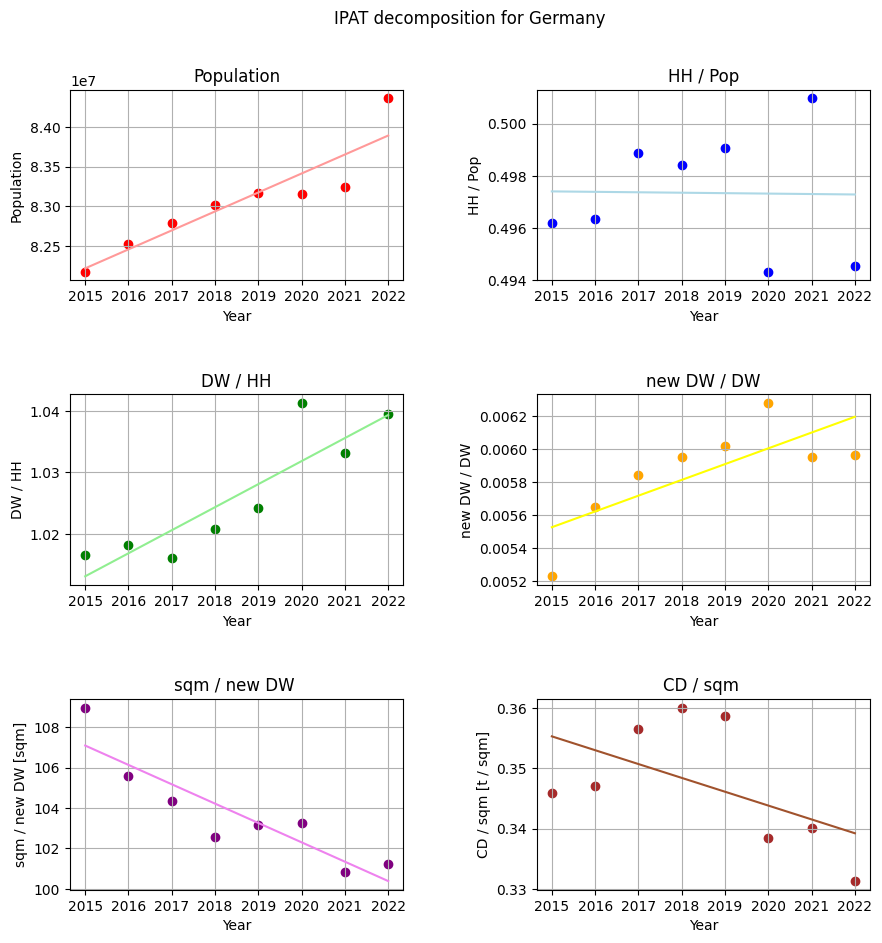

In [9]:
# Redoes the plots with the linear regression

fig, axs = plt.subplots(3, 2, figsize=(10, 10))
fig.suptitle('IPAT decomposition for Germany')
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.6)

axs[0, 0].scatter(ipat.index,ipat['Population'], color='red', marker='o')
axs[0, 0].plot(ipat.index, ipat_regression_df['slope']['Population']*ipat.index + ipat_regression_df['intercept']['Population'], color=(1.0, 0.6, 0.6))
axs[0, 0].set_title('Population')
axs[0,0].set_ylabel('Population')
axs[0,0].set_xlabel('Year')
axs[0,0].set_xticks(range(int(axs[0,0].get_xlim()[0])+1, int(axs[0,0].get_xlim()[1]) + 1))
axs[0,0].grid()

axs[0, 1].scatter(ipat.index,ipat['HH / Pop'], color='blue', marker='o')
axs[0, 1].plot(ipat.index, ipat_regression_df['slope']['HH / Pop']*ipat.index + ipat_regression_df['intercept']['HH / Pop'], color='lightblue')
axs[0, 1].set_title('HH / Pop')
axs[0,1].set_ylabel('HH / Pop')
axs[0,1].set_xlabel('Year')
axs[0,1].set_xticks(range(int(axs[0,1].get_xlim()[0])+1, int(axs[0,1].get_xlim()[1]) + 1))
axs[0,1].grid()

axs[1, 0].scatter(ipat.index,ipat['DW / HH'], color='green', marker='o')
axs[1, 0].plot(ipat.index, ipat_regression_df['slope']['DW / HH']*ipat.index + ipat_regression_df['intercept']['DW / HH'], color='lightgreen')
axs[1, 0].set_title('DW / HH')
axs[1,0].set_ylabel('DW / HH')
axs[1,0].set_xlabel('Year')
axs[1,0].set_xticks(range(int(axs[1,0].get_xlim()[0])+1, int(axs[1,0].get_xlim()[1]) + 1))
axs[1,0].grid()

axs[1, 1].scatter(ipat.index,ipat['new DW / tot DW'], color='orange', marker='o')
axs[1, 1].plot(ipat.index, ipat_regression_df['slope']['new DW / tot DW']*ipat.index + ipat_regression_df['intercept']['new DW / tot DW'], color='yellow')
axs[1, 1].set_title('new DW / DW')
axs[1,1].set_ylabel('new DW / DW')
axs[1,1].set_xlabel('Year')
axs[1,1].set_xticks(range(int(axs[1,1].get_xlim()[0])+1, int(axs[1,1].get_xlim()[1]) + 1))
axs[1,1].grid()

axs[2, 0].scatter(ipat.index,ipat['sqm / new DW [sqm]'], color='purple',marker='o')
axs[2, 0].plot(ipat.index, ipat_regression_df['slope']['sqm / new DW [sqm]']*ipat.index + ipat_regression_df['intercept']['sqm / new DW [sqm]'], color='violet')
axs[2, 0].set_title('sqm / new DW ')
axs[2,0].set_ylabel('sqm / new DW [sqm]')
axs[2,0].set_xlabel('Year')
axs[2,0].set_xticks(range(int(axs[2,0].get_xlim()[0])+1, int(axs[2,0].get_xlim()[1]) + 1))
axs[2,0].grid()

axs[2, 1].scatter(ipat.index,ipat['CD / sqm [t / sqm]'], color='brown', marker='o')
axs[2, 1].plot(ipat.index, ipat_regression_df['slope']['CD / sqm [t / sqm]']*ipat.index + ipat_regression_df['intercept']['CD / sqm [t / sqm]'], color='sienna')
axs[2, 1].set_title('CD / sqm ')
axs[2,1].set_ylabel('CD / sqm [t / sqm]')
axs[2,1].set_xlabel('Year')
axs[2,1].set_xticks(range(int(axs[2,1].get_xlim()[0])+1, int(axs[2,1].get_xlim()[1]) + 1))
axs[2,1].grid()

plt.show()

